# 3. Praktikum Data Science - Clustering

---

### Aufgabe 2: Hierarchisches Clustering, PCA und interaktive Visualisierung

**Ziel**: Verstehen und Anwenden von hierarchischem Clustering und Visualisierung in einem interaktiven Diagramm mit PCA und Plotly.

**Aufgaben**:

1. **Datenstandardisierung und hierarchisches Clustering**:
   - Laden Sie den bereitgestellten Datensatz.
   - Führen Sie ein hierarchisches Clustering durch.
   - Erstellen Sie ein Dendrogramm zur Visualisierung des Clustering-Prozesses.

2. **Bestimmung der Anzahl von Clustern**:
   - Verwenden Sie das Dendrogramm, um einen "Cut-Off-Abstand" festzulegen und die Anzahl der Cluster zu bestimmen.
   - Ordnen Sie jeden Datenpunkt einem Cluster zu, basierend auf der gewählten Cut-Off-Distanz.

3. **PCA zur Visualisierung**:
   - informieren sie sich zum Thema PCA
   - Führen Sie eine PCA durch, um die Daten auf zwei Hauptkomponenten zu reduzieren.

4. **Interaktive Plotly-Visualisierung**:
   - Erstellen Sie ein interaktives Plotly-Streudiagramm mit den PCA-reduzierten Daten.
   - Passen Sie die Hover-Informationen an, um Details über die Datenpunkte und ihre Clusterzuordnung anzuzeigen.

## 1.1 Bibliotheken und Daten laden

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import fcluster
from sklearn.decomposition import PCA
import plotly.graph_objs as go

In [28]:
# Load the CSV file
csv_file_path = 'data.csv'
csv_data = pd.read_csv(csv_file_path)

print(csv_data.columns)

Index(['Unnamed: 0', 'published_at', 'channel', 'title', 'duration', 'caption',
       'licensed_content', 'projection', 'trend_time_hours', 'weekday',
       'hours_until_trend', 'likes_growth', 'likes_growth/hour', 'first_rank',
       'best_rank', 'views_growth', 'views_growth/hour', 'views_cleaned',
       'likes_cleaned', 'dislikes_cleaned', 'comments_cleaned',
       'category_name', 'duration_category', 'day_of_week'],
      dtype='object')


## 1.2 Features festlegen und Daten standardisieren
- Wir wählen wieder unsere Features aus und verwenden den StandardScaler um sie zu standardisieren

In [4]:

# Merkmale für das Clustering auswählen
selected_features = ['duration', 'views_growth', 'likes_cleaned', 'dislikes_cleaned', 'comments_cleaned']
clustering_data = csv_data[selected_features]


In [5]:
# Standardisierung der Daten
standardized_data=StandardScaler().fit(clustering_data).transform(clustering_data) 

############
# Code um das Mitttel der ersten Spalte ("duration") zu berechnen - Persönliche Überprüfung
# standardized_data_df = pd.DataFrame(standardized_data, columns=selected_features)
# standardized_data_firstrow_mean = standardized_data_df.iloc[0].mean()
# print(standardized_data_firstrow_mean)

## 1.3 Hierarchical Clustering durchführen 
- Führen Sie ein hierarchisches Clustering durch.
- Erstellen Sie ein Dendrogramm wie unten aufgeführt

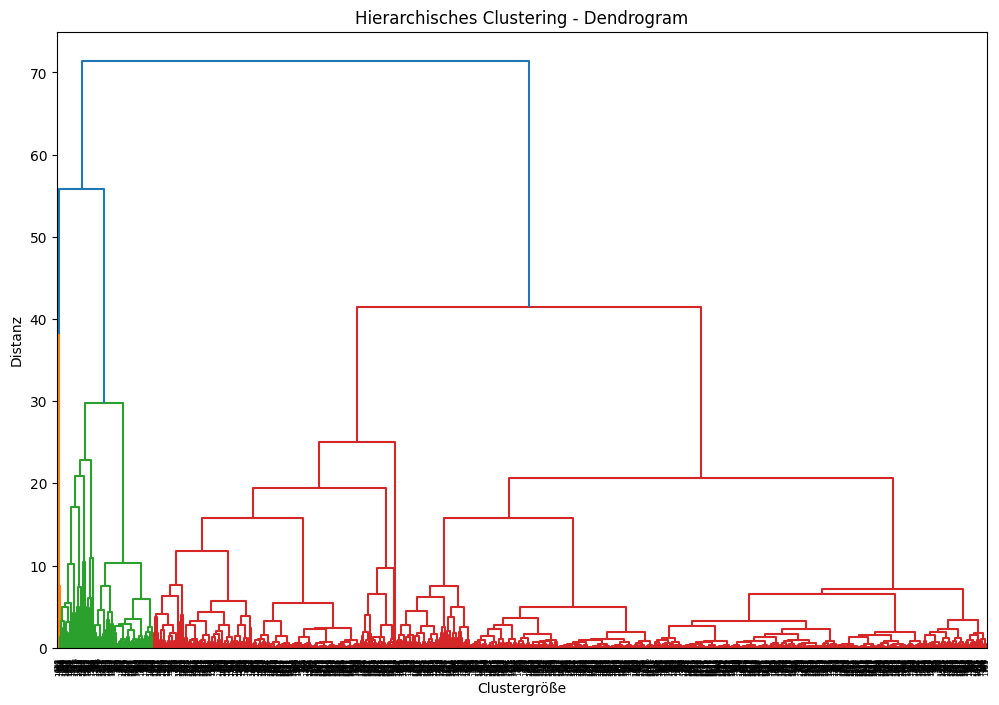

In [6]:
# CODE
# clustering = AgglomerativeClustering(linkage="Ward", n_clusters=10) # https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

linkage_matrix = linkage(standardized_data, method='ward')

# print(linkage_matrix)

plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=clustering_data.index, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchisches Clustering - Dendrogram')
plt.xlabel('Clustergröße')
plt.ylabel('Distanz')
plt.show()
  

## Screenshot des erwarteten Ergebnisses:

![Dendogramm](dendogramm_output.png)

## 2. Bestimmung der Anzahl von Clustern
   - Wir verwenden das Dendrogramm, um einen "Cut-Off" festzulegen und die Anzahl der Cluster zu bestimmen.
   - Wir legen den `distance_threshhold` auf 25 fest
   - berechnen sie die Cluster mit `fcluster` 

Cluster [5 4 1 ... 1 1 1]


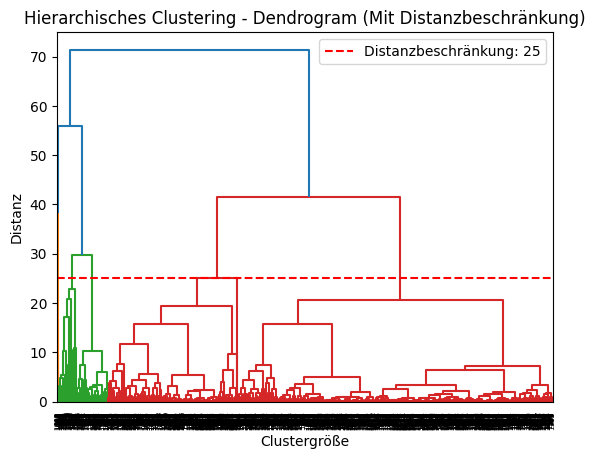

In [7]:
distance_threshold = 25
clusters = fcluster(linkage_matrix, distance_threshold, criterion='distance')
print("Cluster", clusters)


# Visuelle Ausgabe dessen was oben getan werden soll

dendrogram(linkage_matrix, labels=clustering_data.index, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchisches Clustering - Dendrogram (Mit Distanzbeschränkung)')
plt.xlabel('Clustergröße')
plt.ylabel('Distanz')

plt.axhline(y=distance_threshold, color='r', linestyle='--', label=f'Distanzbeschränkung: {distance_threshold}')
plt.legend()

plt.show()


## 3. Dimensionalitätsreduktion mit PCA
Da es schwierig ist, mehrdimensionale Daten direkt zu visualisieren, werden wir die Technik der Hauptkomponentenanalyse (PCA) nutzen, um unsere Daten auf zwei Hauptkomponenten zu reduzieren. Dies ermöglicht es uns, die Daten in einem zweidimensionalen Raum zu plotten und dabei die wesentlichen Informationen zu bewahren.
- Führen Sie eine PCA durch, um die Daten auf zwei Hauptkomponenten zu reduzieren.
- Fügen sie die Spalten dem DataFrame hinzu

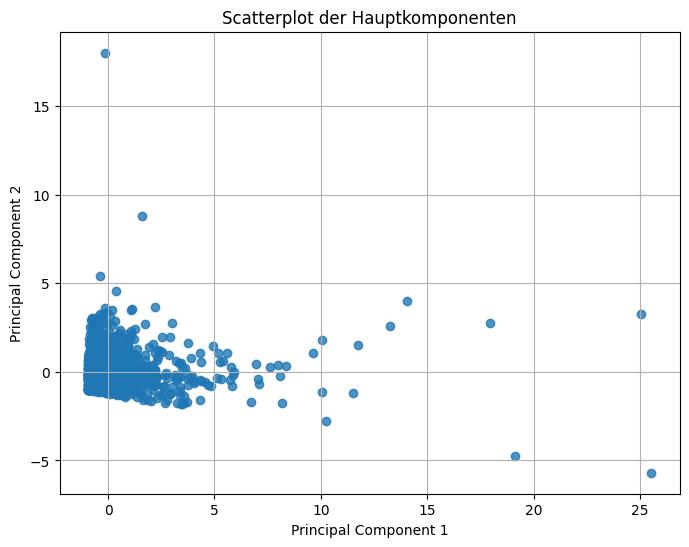

In [8]:
# Hauptkomponentenanalyse
# pca = PCA()
# principal_components = pca.fit_transform(standardized_data)

# # datenframe zur Visualisierung
# pc_columns = [f'PC{i + 1}' for i in range(principal_components.shape[1])]
# principal_components_df = pd.DataFrame(data=principal_components, columns=pc_columns)

# explained_variance_ratio = pca.explained_variance_ratio_

# cumulative_explained_variance = explained_variance_ratio.cumsum()
# plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
# plt.title('Cumulative Explained Variance')
# plt.xlabel('Number of Principal Components')
# plt.ylabel('Cumulative Explained Variance')
# plt.show()

# PCA durchführen und die Anzahl der gewünschten Hauptkomponenten angeben (in diesem Fall 2)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(standardized_data)

#  Erstelle ein DataFrame mit den reduzierten Dimensionen
columns = ['Principal Component 1', 'Principal Component 2']
principal_df = pd.DataFrame(data=principal_components, columns=columns)

plt.figure(figsize=(8, 6))
plt.scatter(principal_df['Principal Component 1'], principal_df['Principal Component 2'], alpha=0.8)
plt.title('Scatterplot der Hauptkomponenten')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()



## 4. Erstellung eines interaktiven Plots mit Plotly

In diesem Abschnitt unseres Projekts werden wir einen interaktiven Plot erstellen, der es uns ermöglicht, die Daten auf eine neue und dynamische Weise zu explorieren:

- **Implementierung in Python**:
  Um unseren interaktiven Plot zu gestalten, verwenden wir die Bibliothek `plotly.graph_objs` von Plotly, die eine Vielzahl von Graphen und Visualisierungswerkzeugen bietet.

- **Erstellen des Scatterplots**:
  Mit der `Scatter`-Funktion aus `plotly.graph_objs` erstellen wir einen Streudiagramm (Scatterplot), in dem wir die ersten beiden Hauptkomponenten als Achsen verwenden.

- **Daten für die Interaktivität**:
  Um die Interaktivität zu verbessern, werden wir die Originaldaten als Hover-Text hinzufügen. Dies erlaubt es den Betrachtern, beim Mouse-over der Datenpunkte, detaillierte Informationen zu erhalten. Für eine saubere Organisation empfiehlt es sich, neue Spalten im DataFrame zu erstellen, die diesen Text enthalten.


In [61]:
df_for_plotly = csv_data.copy()

df_for_plotly['Principal Component 1'] = principal_df['Principal Component 1']
df_for_plotly['Principal Component 2'] = principal_df['Principal Component 2']
df_for_plotly['Cluster'] = clusters #principal_df['Principal Component 2']

trace = go.Scatter(
    x=df_for_plotly['Principal Component 1'],
    y=df_for_plotly['Principal Component 2'],
    mode='markers',
    marker=dict(
        color=df_for_plotly['Principal Component 1'],
        colorscale=('viridis'),
        colorbar=dict(title=''),
        size=15
    ),
    text=[
        f'Cluster: {cluster}<br>------------------<br>Channel: {channel}<br>Title: {title}<br>Duration: {"50+" if duration > 50 else f"{duration}"} min<br>Views Growth {viewg}<br>Like {likes}<br>Dislikes {dislikes}<br>Comments {comments}<br>'
        
        for cluster, channel, title, duration, viewg, likes, dislikes, comments in zip(
            df_for_plotly['Cluster'], 
            df_for_plotly['channel'], 
            df_for_plotly['title'], 
            df_for_plotly['duration'], 
            df_for_plotly['views_growth'], 
            df_for_plotly['likes_cleaned'], 
            df_for_plotly['dislikes_cleaned'], 
            df_for_plotly['comments_cleaned'])

    ]
)

# Index(['Unnamed: 0', 'published_at', 'channel', 'title', 'duration', 'caption',
#        'licensed_content', 'projection', 'trend_time_hours', 'weekday',
#        'hours_until_trend', 'likes_growth', 'likes_growth/hour', 'first_rank',
#        'best_rank', 'views_growth', 'views_growth/hour', 'views_cleaned',
#        'likes_cleaned', 'dislikes_cleaned', 'comments_cleaned',
#        'category_name', 'duration_category', 'day_of_week'],
#       dtype='object')


layout = go.Layout(
    title='Scatterplot der Hauptkomponenten',
    xaxis=dict(title='Principal Component 1'),
    yaxis=dict(title='Principal Component 2')
)

fig = go.Figure(data=[trace], layout=layout)
fig.show()

## Screenshot des interaktiven Plots:
- so sollte der Mouseover ungefähr aussehen

![Plotly Diagramm](plotly_mouseover.png)
